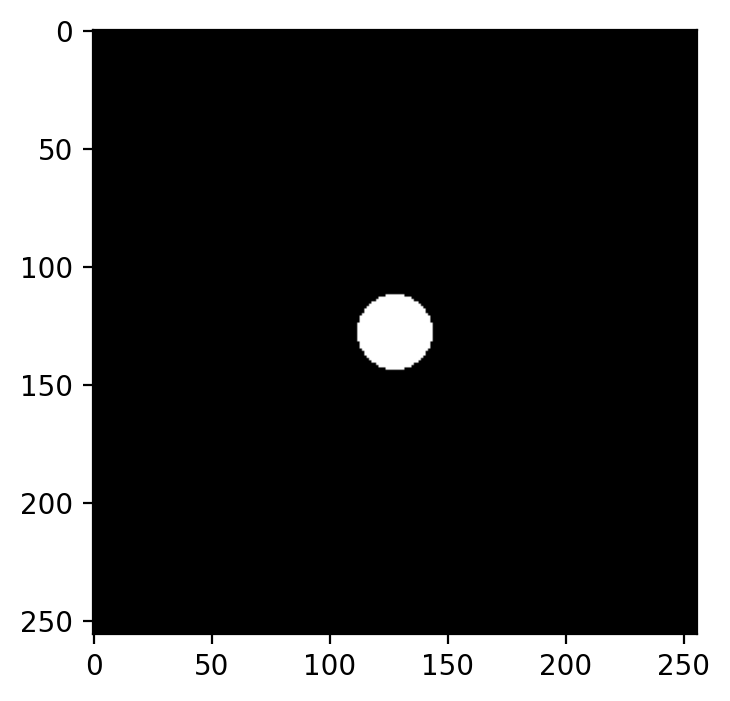

In [ ]:
import numpy as np
import math 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

N = 256
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.25)]=1.0
plt.imshow(A, cmap = 'gray')

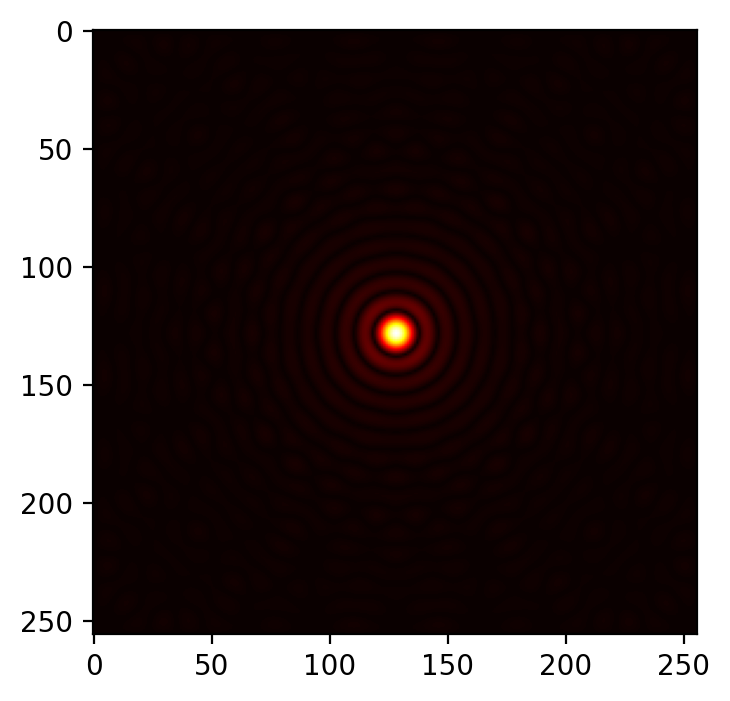

In [ ]:
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

a. Sinusoid


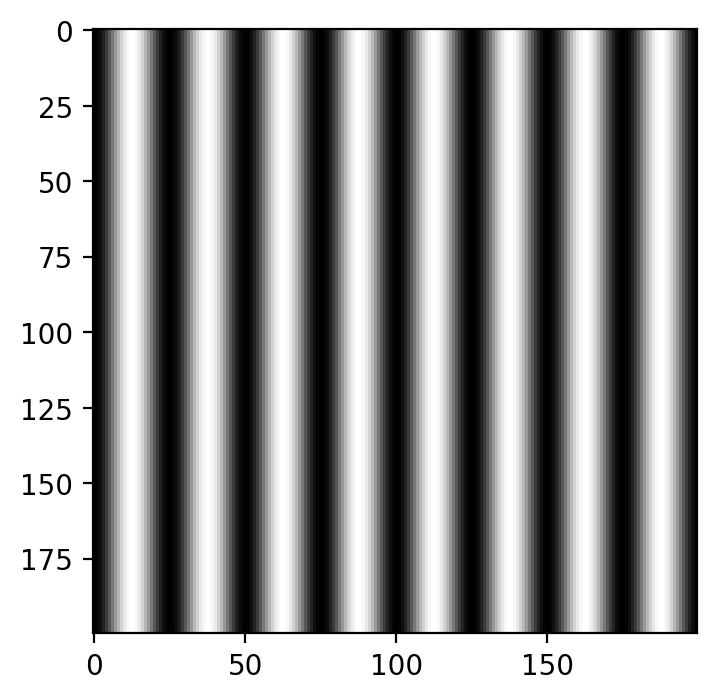

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,pi

N = 200 #N x N pixels
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A = np.zeros(np.shape(x))
for n in range(N):
  A[:,n] = 2*(((sin(2*pi*4*n/N))**2) - 0.5)

#for n in range(N):
  #for m in range(N):
    #if A[n,m] == 0.0:
      #A[n,m] = -1.0

plt.imshow(A, cmap = "gray")

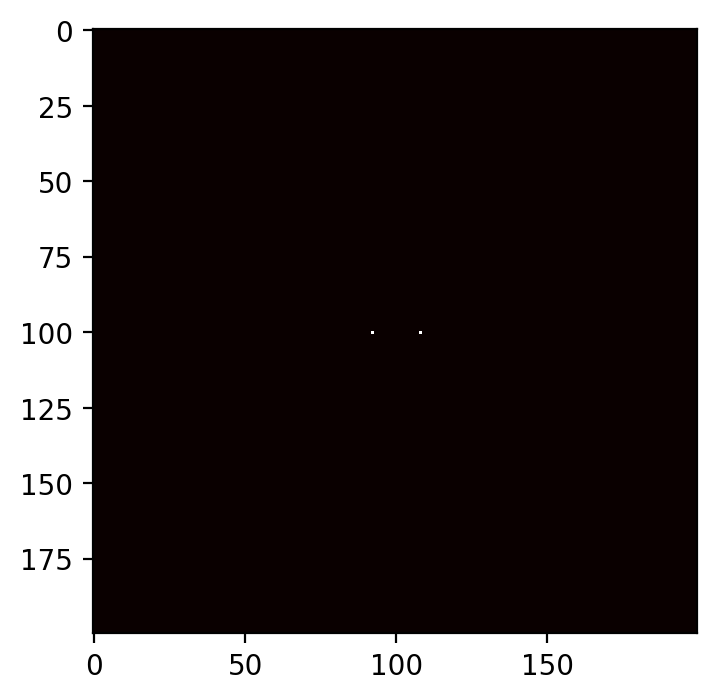

In [ ]:
FA = np.fft.fft2(A) #2d fast fourier transform
FAshifted = np.fft.fftshift(FA) #fftshift to zero-center FA
plt.imshow((abs(FAshifted)), cmap = 'hot')

b. Square

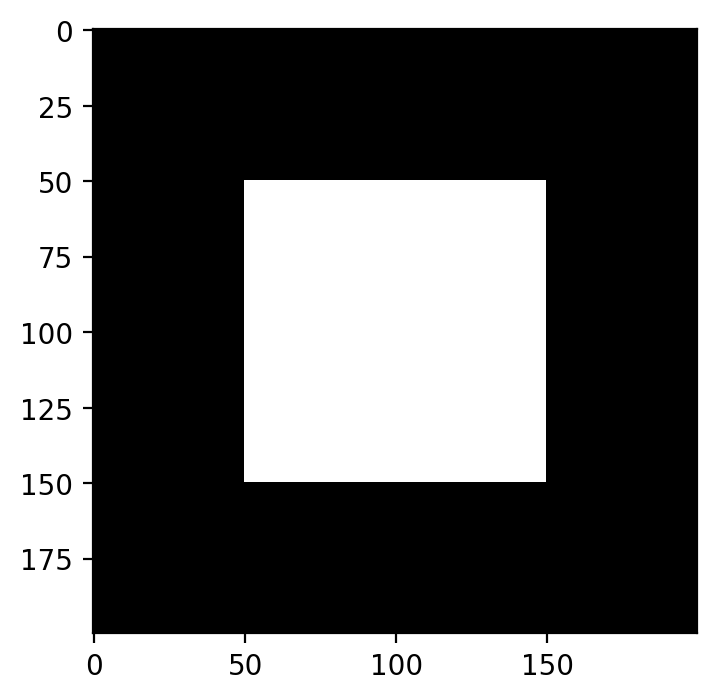

In [ ]:
N = 200 #N x N pixels
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A = np.zeros(np.shape(x))

for m in range(N):
  for n in range(N):
    if x[m,n]>-1 and x[m,n]<1:
      if y[m,n]>-1 and y[m,n]<1:
        A[m,n] = 1.0
      else: 
        A[m,n] = 0.0

plt.imshow(A, cmap = "gray")

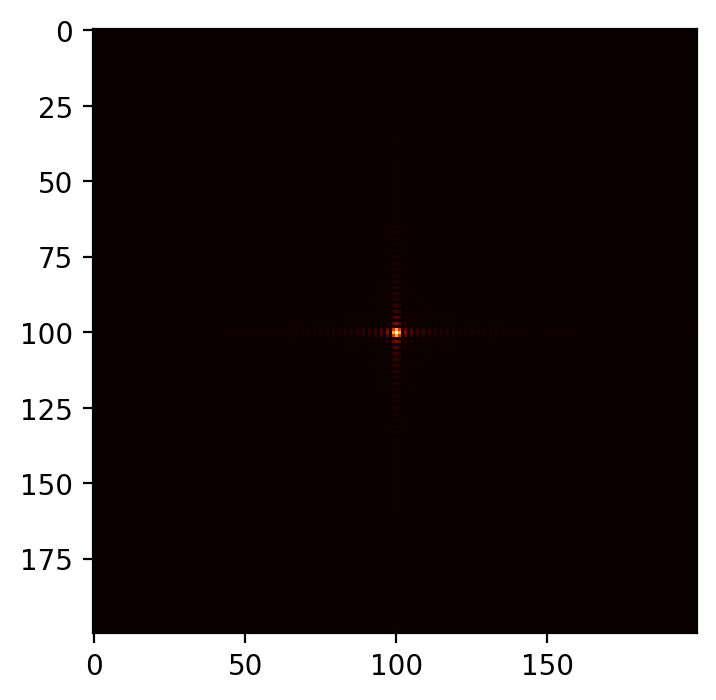

In [ ]:
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

c.Double Slit

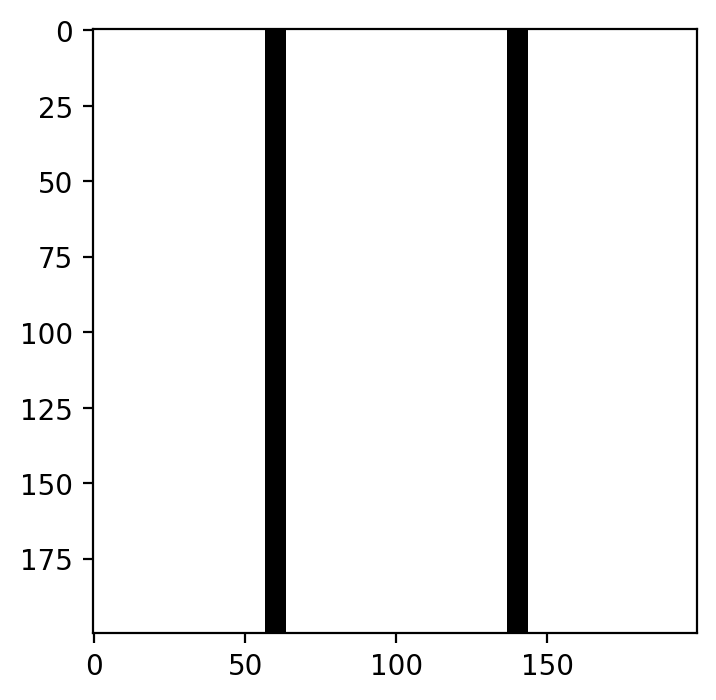

In [ ]:
N = 200 #N x N pixels
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A = np.zeros(np.shape(x))
for n in range(N):
  A[:,n] = round(sin(2*pi*5*n/N))**2

for n in range(N):
  for m in range(N):
    if A[n,m] == 0.0:
      A[n,m] = -1.0

#Making double slit from original square wave
for n in range(N):
  for m in range(N):
    if A[n,m] == 0.0:
      A[n,m] = -1.0
    if m<50:
      A[n,m] = 1.0
    if m>75 and m<130:
      A[n,m] = 1.0
    if m>150:
      A[n,m] = 1.0

plt.imshow(A, cmap = "gray")

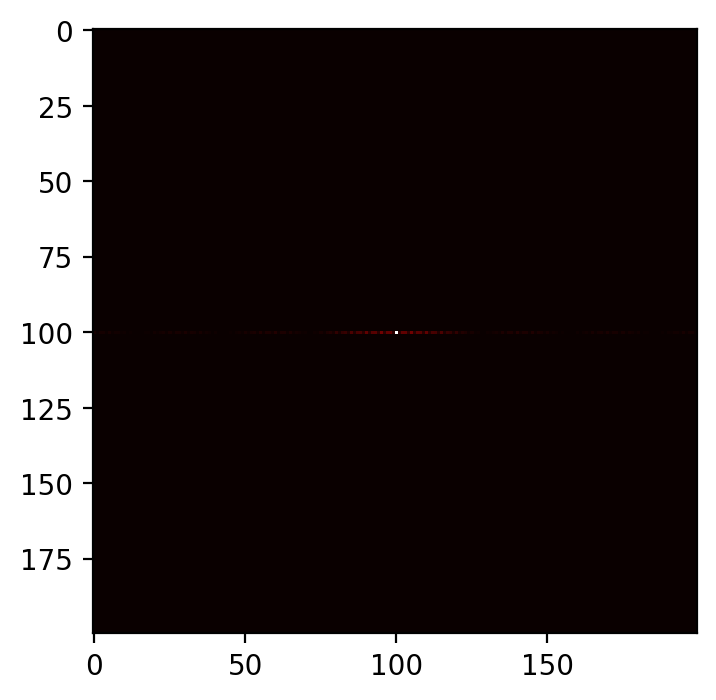

In [ ]:
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

d.Annular

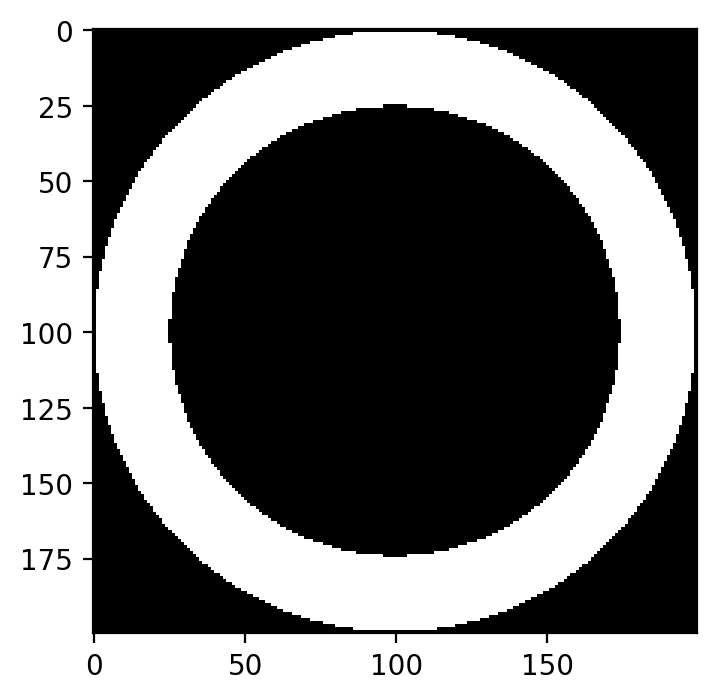

In [ ]:
N = 200 #N x N pixels
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A = np.zeros(np.shape(x))

R = np.sqrt(x**2 + y**2)
for m in range(N):
  for n in range(N):
    if R[m,n]>1.5 and R[m,n]<2:
      A[m,n] = 1.0
    else: 
      A[m,n] = 0.0

plt.imshow(A, cmap = "gray")

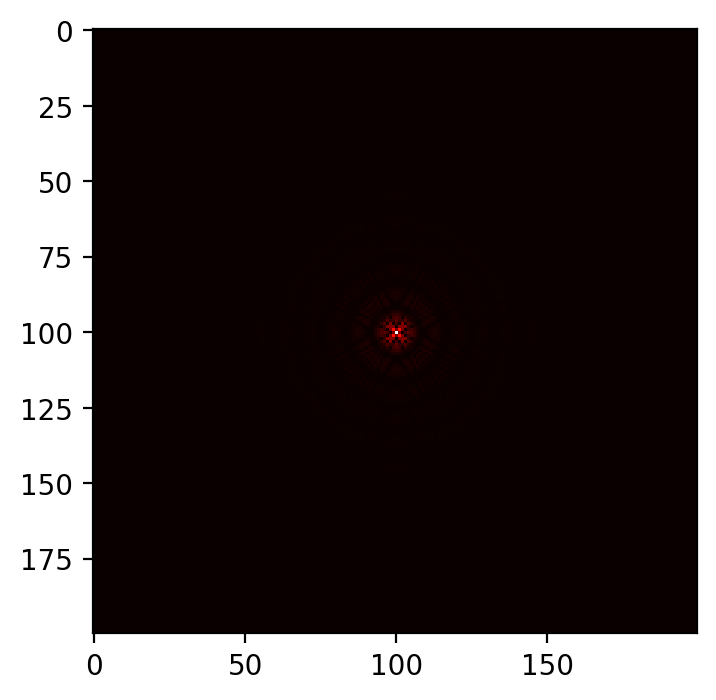

In [ ]:
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

e. Gaussian

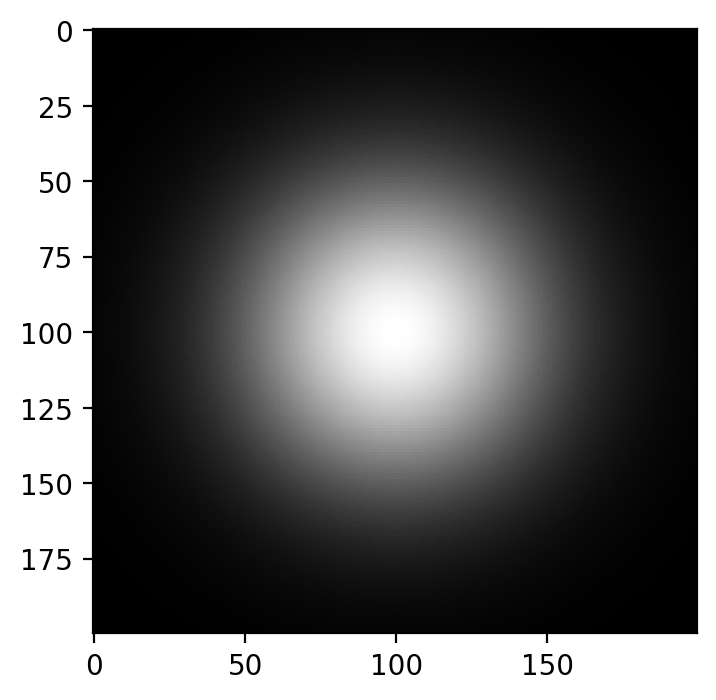

In [ ]:
N = 200 #N x N pixels
x = np.linspace(-2,2,N)
y = x
x,y = np.meshgrid(x,y)
A = np.zeros(np.shape(x))

from scipy.stats import multivariate_normal
xy = np.column_stack([x.flat, y.flat])
mu = np.array([0.0, 0.0])
sigma = np.array([0.72, 0.72])
covariance = np.diag(sigma**2)
A = multivariate_normal.pdf(xy, mean= mu, cov=covariance)
A = A.reshape(x.shape)

plt.imshow(A, cmap = "gray")

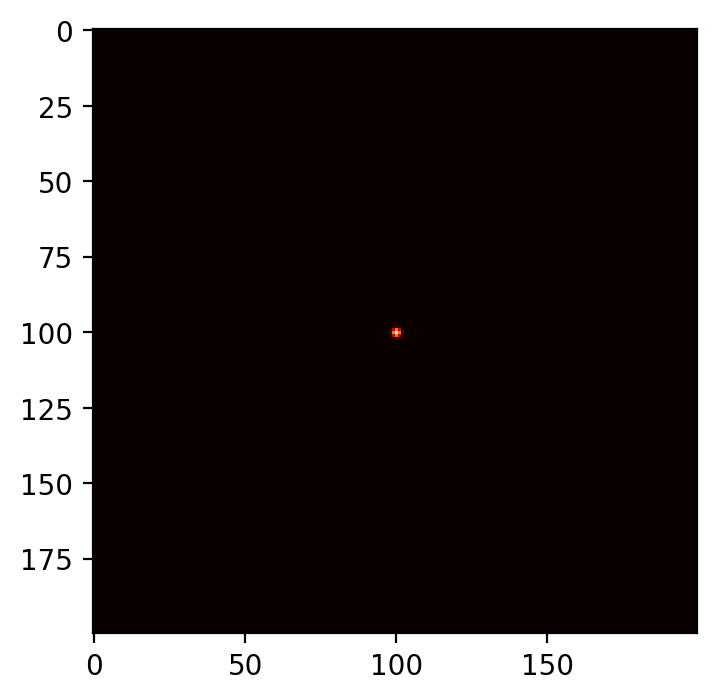

In [ ]:
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

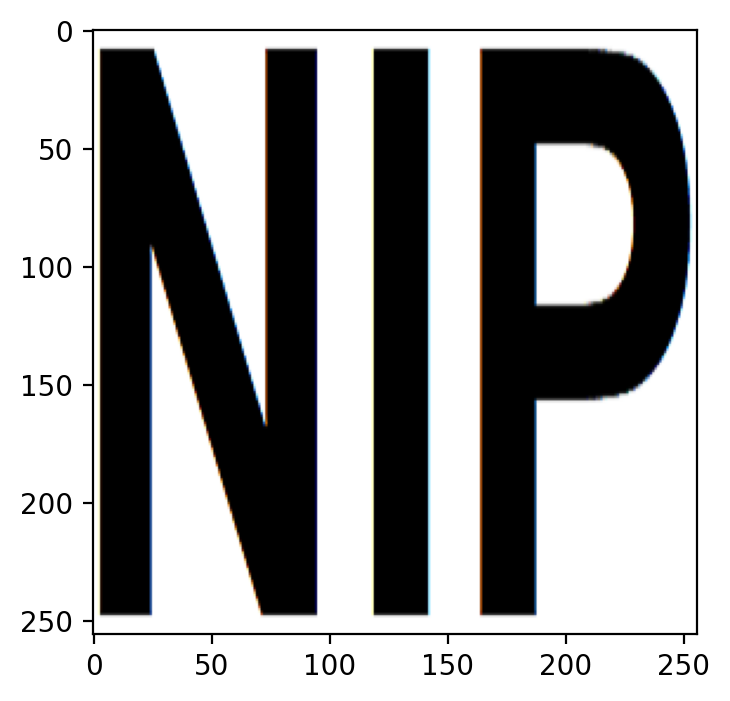

In [ ]:
import skimage.io
#reading image
Img = skimage.io.imread("NIP.BMP")
plt.imshow(Img,cmap ='gray')

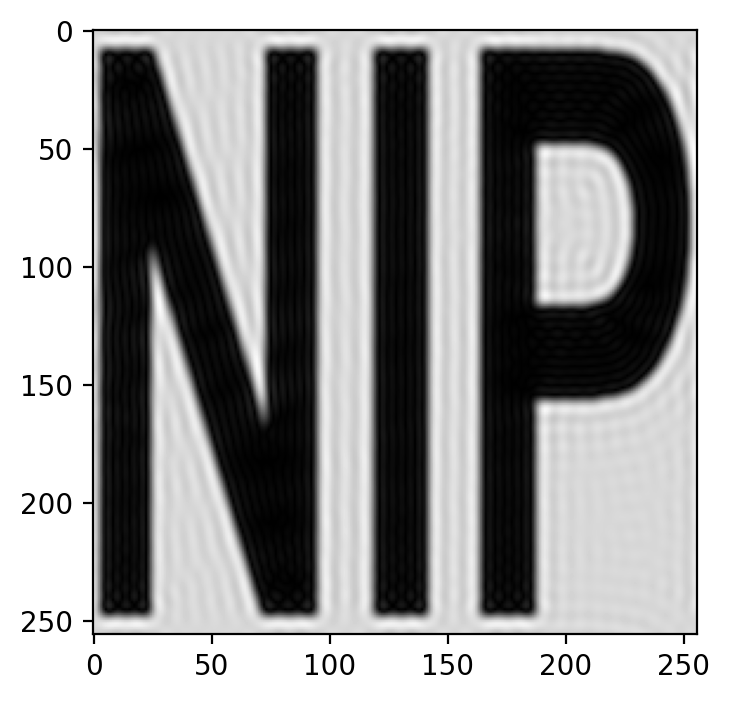

In [ ]:
#25%width
lens = skimage.io.imread("nip2.bmp")
lensshift = np.fft.fftshift(lens[:,:,1]) #fftshift with dimensions(256,256,1)
imgfft = np.fft.fft2(Img[:,:,1]) #2d fft with dimensions (256,256,1)
convol = lensshift*imgfft #convolving
convol = np.fft.ifft2(convol) #invrse 2d fft to obtain convoluted image
plt.imshow(abs(convol), cmap='gray')

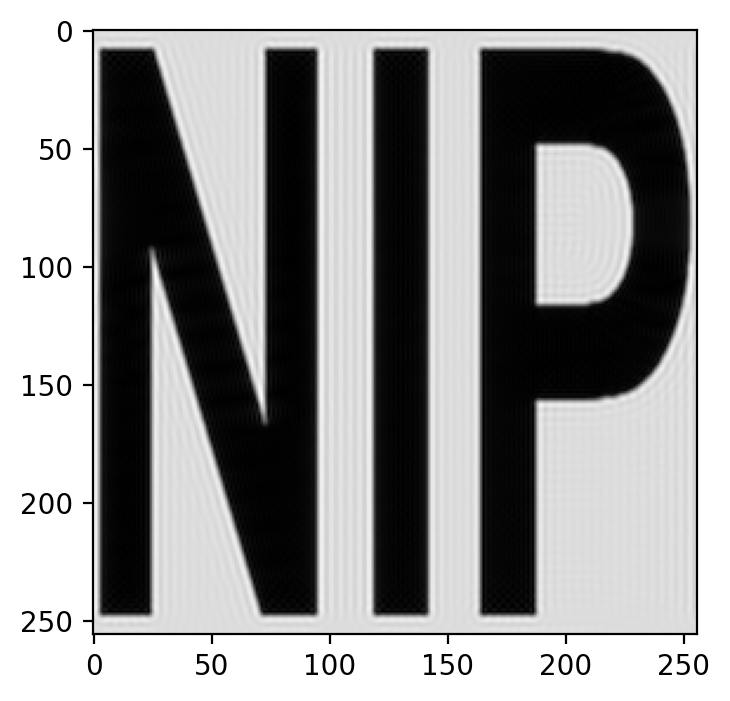

In [ ]:
#50%width
lens = skimage.io.imread("nip3.bmp")
lensshift = np.fft.fftshift(lens[:,:,1])
imgfft = np.fft.fft2(Img[:,:,1])
convol = lensshift*imgfft
convol = np.fft.ifft2(convol)
plt.imshow(abs(convol), cmap='gray')

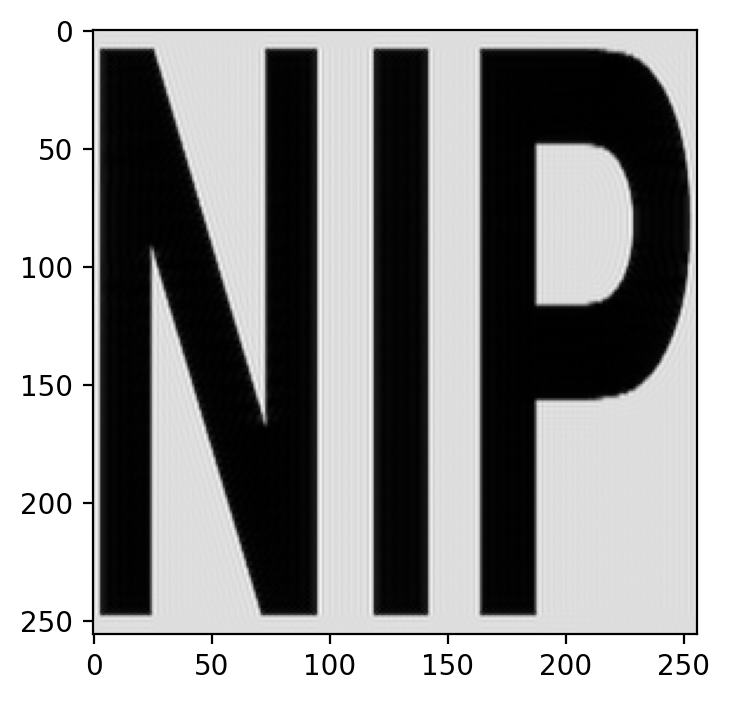

In [ ]:
#75%width
lens = skimage.io.imread("nip4.bmp")
lensshift = np.fft.fftshift(lens[:,:,1])
imgfft = np.fft.fft2(Img[:,:,1])
convol = lensshift*imgfft
convol = np.fft.ifft2(convol)
plt.imshow(abs(convol), cmap='gray')

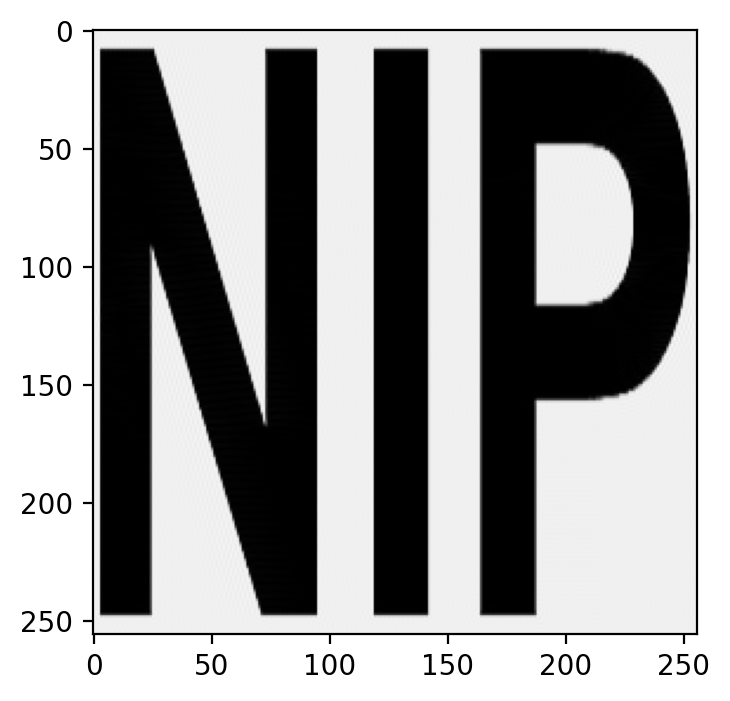

In [ ]:
#100%width
lens = skimage.io.imread("nip5.bmp")
lensshift = np.fft.fftshift(lens[:,:,1])
imgfft = np.fft.fft2(Img[:,:,1])
convol = lensshift*imgfft
convol = np.fft.ifft2(convol)
plt.imshow(abs(convol), cmap='gray')

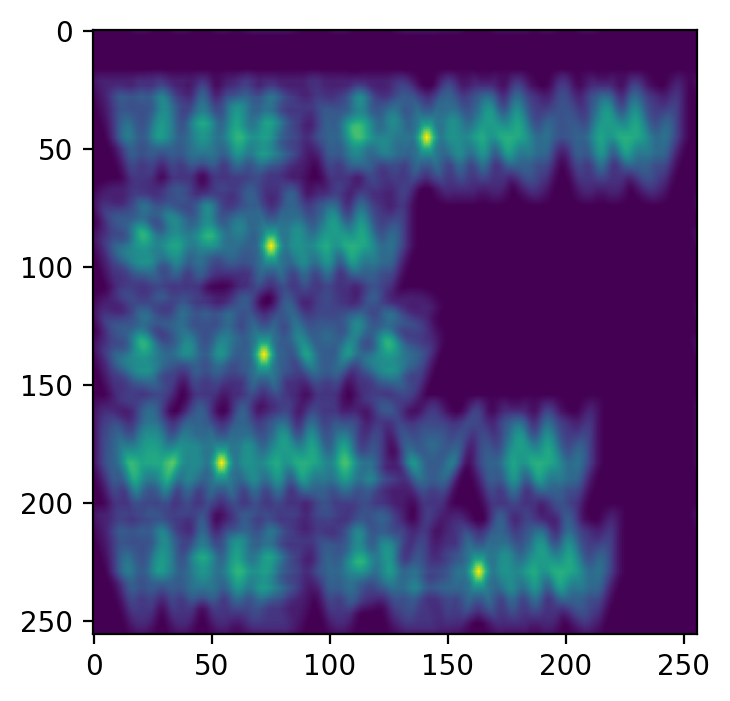

In [ ]:
import skimage.io
import numpy as np
#reading phrase and templates
phrase = skimage.io.imread("3.1.bmp")
template = skimage.io.imread("3.2.bmp")
#taking 2d fft of both
fftp = np.fft.fft2(phrase[:,:,1])
fftt = np.fft.fft2(template[:,:,1])
P = (np.conj(fftp))*fftt
smallp = np.fft.fft2(P)

plt.imshow(np.fft.fftshift(abs(smallp)))

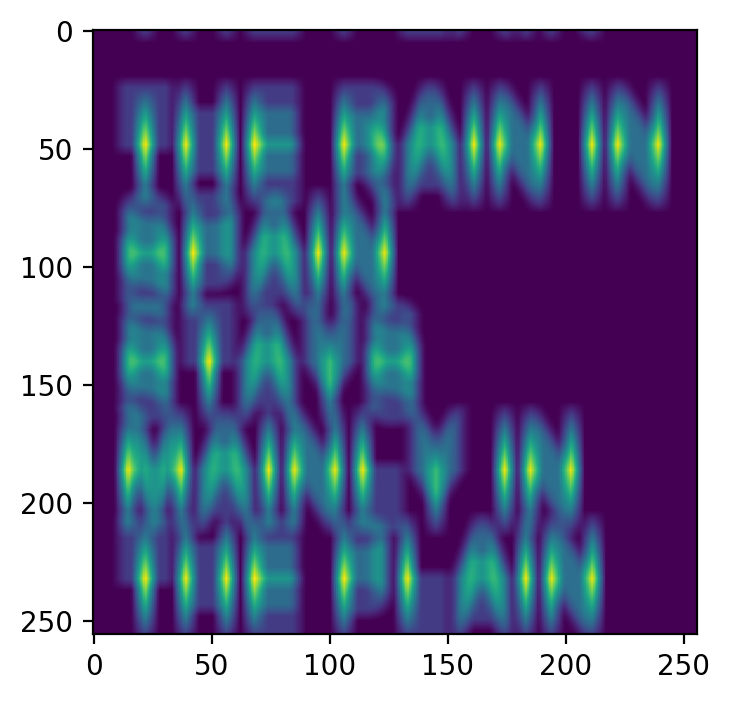

In [ ]:
template = skimage.io.imread("3.3.bmp")
fftt = np.fft.fft2(template[:,:,1])
P = (np.conj(fftp))*fftt
smallp = np.fft.fft2(P)

plt.imshow(np.fft.fftshift(abs(smallp)))